In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import lightkurve as lk

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lightkurve as lk

import sympy as sp

from ipywidgets import *
import pandas as pd
from sympy import latex
from IPython.display import display, Math

import utils
import starry
import numpy as np

starry.config.lazy = False
starry.config.quiet = True

In [2]:
lc = pd.read_csv("/Users/shashank/Documents/Astronomy/M35 paper/200000811_JD_UTC.txt",delim_whitespace=True,
                names=['BJD', "flux",'err'])
lc_params = {'Epoch':2456784.9266, 'period':7.5567,'tdur':0.1918}

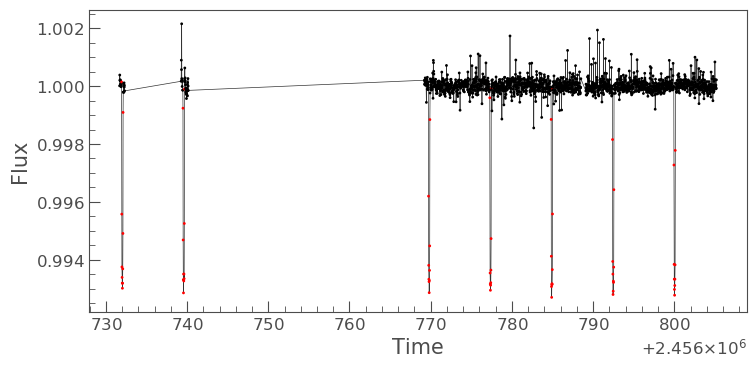

In [3]:
lc = lk.LightCurve(time=lc['BJD'],flux=lc['flux'], flux_err=lc['err'])
transit_mask = np.logical_or((lc.time-(lc_params['Epoch']))%lc_params['period']>lc_params['period']-lc_params['tdur']/2, (lc.time-(lc_params['Epoch']))%lc_params['period']<lc_params['tdur']/2)
#take the data +/- 24 hours surrounding the transit
lc.plot()
colormap = ['red' if i==True else 'black' for i in transit_mask]
plt.scatter(lc.time,lc.flux, color=colormap,s=1,zorder=10)  

(0.991, 1.001)

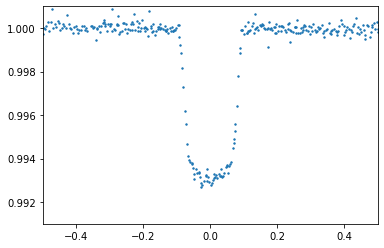

In [4]:
folded_lc = lc.fold(lc_params['period'],lc_params['Epoch'])
plt.scatter(folded_lc.phase*lc_params['period'], folded_lc.flux,s=2)
plt.xlim([-0.5,+0.5])
ylim = [0.991,1.001]
plt.ylim(ylim)

In [5]:
u1 = 0.22
u2 = 0.28
inc = 0
omega_s = 0.55 #(np.sin(np.radians(90-inc))) #should create a function converting vsini to omega*sini

G_mks = 6.67e-11
Msun = 1.989e+30
Rsun = 6.95700e8
M_star = 1.85
R_star = 1.85
#omega_s = 2*pi
#omega_s = 0

i_p = 85.5
long_p = 0
r_p = 0.08270
f = utils.f(omega_s)
print(f)

0.13137893593919658


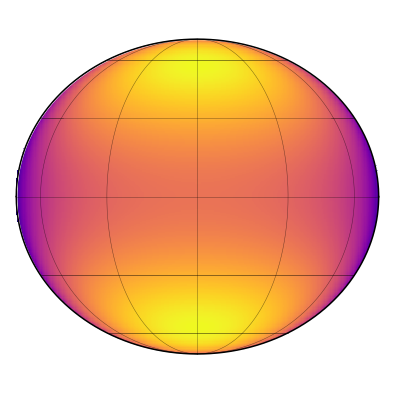

In [6]:
map = starry.Map(ydeg=20, udeg=2, oblate=True, lazy=False) #ydeg = 2*order_approx udeg=2

lat, lon, Y2P, P2Y, Dx, Dy = map.get_pixel_transforms()
phi = np.radians(lat)
theta = np.radians(lon)
x = np.cos(phi) * np.cos(theta)
y = np.cos(phi) * np.sin(theta)
z = np.sin(phi)

flux_map = utils.flux_oblate(x, y, wav=5.1e-7, omega=omega_s, beta=0.23, tpole=8500)
y = P2Y.dot(flux_map)
map[1:, :] = y[1:] / y[0]
map.amp = y[0]
map.f = f
map[1] = u1
map[2] = u2
map.obl=0
map.inc =90
fig = map.show(figsize=(7,7),colorbar=False)

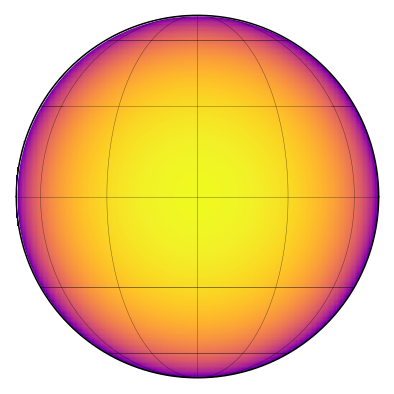

In [7]:
map_sph = starry.Map(ydeg=20, udeg=2, lazy=False) #ydeg = 2*order_approx udeg=2

lat, lon, Y2P, P2Y, Dx, Dy = map.get_pixel_transforms()
phi = np.radians(lat)
theta = np.radians(lon)
x = np.cos(phi) * np.cos(theta)
y = np.cos(phi) * np.sin(theta)
z = np.sin(phi)

flux_map = utils.flux_oblate(x, y, wav=5.1e-7, omega=omega_s, beta=0.0, tpole=8500)
y = P2Y.dot(flux_map)
map_sph[1:, :] = y[1:] / y[0]
map_sph.amp = y[0]
map_sph[1] = u1
map_sph[2] = u2
fig = map_sph.show(figsize=(7,7),colorbar=False)

0.7791554979591688


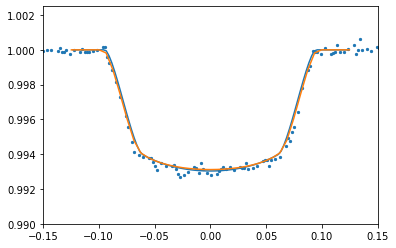

In [11]:
xo = np.linspace(-1.0, 1.0, 100)
b = 0.73
r_p = 0.06770
dur = np.sqrt((1+r_p)**2 - b**2)
time_model = (xo/dur)*lc_params['tdur']*0.5

print(dur)

plt.scatter(folded_lc.phase*lc_params['period'], folded_lc.flux,s=5)
plt.ylim([0.9900,1.0025])
plt.xlim([-0.15,+0.15])

map.obl = 0
map.inc = 56
map[1] = 0.1
map[2] = 0.1
flux_obl = map.flux(xo=(xo*(1-f*np.cos(np.radians(map.inc)))), yo=b, ro=r_p)
plt.plot(time_model, flux_obl / flux_obl[0])


xo = np.linspace(-1.0, 1.0, 41)
b = 0.76105322856
r_p = 0.08270
dur = np.sqrt((1+r_p)**2 - b**2)
time_model = (xo/dur)*lc_params['tdur']*0.5
flux_sph = map_sph.flux(xo=xo, yo=b, ro=r_p)
plt.plot(time_model, flux_sph / flux_sph[0])

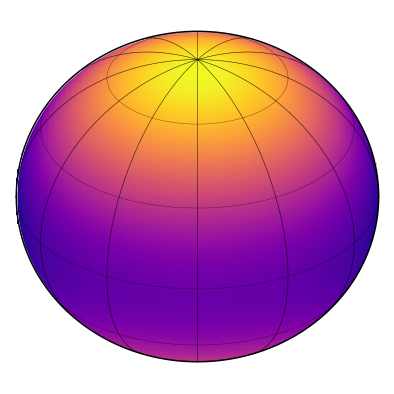

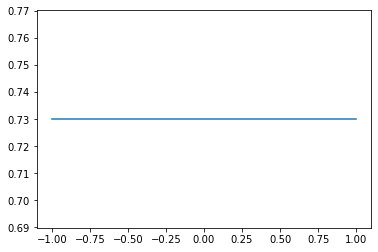

In [9]:
fig = map.show(figsize=(7,7),colorbar=False)
plt.plot(np.linspace(-1,1,10), np.linspace(0.73,0.73,10))